# Рынок заведений общественного питания Москвы


## Загрузка данных и изучение общей информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from plotly import graph_objects as go
import plotly.express as px
import numpy as np
import seaborn as sns
import re
from plotly import graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default='notebook'

In [2]:
!pip install folium
import folium
# подключаем модуль для работы с JSON-форматом
import json
# импортируем карту и хороплет
from folium import Map, Choropleth
from folium import Marker

Defaulting to user installation because normal site-packages is not writeable


In [5]:
# загрузка данных о заведениях общественного питания Москвы
df = pd.read_csv('moscow_places.csv', sep=',')
# просмотр информации о таблице
df.info()
# просмотр таблицы 
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


name  category                              address  \
0                WoWфли      кафе           Москва, улица Дыбенко, 7/1   
1        Четыре комнаты  ресторан   Москва, улица Дыбенко, 36, корп. 1   
2                 Хазри      кафе       Москва, Клязьминская улица, 15   
3  Dormouse Coffee Shop   кофейня  Москва, улица Маршала Федоренко, 12   
4             Иль Марко  пиццерия      Москва, Правобережная улица, 1Б   

                          district  \
0  Северный административный округ   
1  Северный административный округ   
2  Северный административный округ   
3  Северный административный округ   
4  Северный административный округ   

                                               hours        lat        lng  \
0                             ежедневно, 10:00–22:00  55.878494  37.478860   
1                             ежедневно, 10:00–22:00  55.875801  37.484479   
2  пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...  55.889146  37.525901   
3                             ежедневно, 09:00–22:00  55.881608  37.488860   
4                             ежедневно, 10:00–22:00  55.881166  37.449357   

   rating          price                       avg_bill  middle_avg_bill  \
0     5.0            NaN                            NaN              NaN   
1     4.5  выше среднего       Средний счёт:1500–1600 ₽           1550.0   
2     4.6        средние         Средний счёт:от 1000 ₽           1000.0   
3     5.0            NaN  Цена чашки капучино:155–185 ₽              NaN   
4     5.0        средние         Средний счёт:400–600 ₽            500.0   

   middle_coffee_cup  chain  seats  
0                NaN      0    NaN  
1                NaN      0    4.0  
2                NaN      0   45.0  
3              170.0      0    NaN  
4                NaN      1  148.0

**Описание данных**
- `name` — название заведения;
- `address` — адрес заведения;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `lat` — широта географической точки, в которой находится заведение;
- `lng` — долгота географической точки, в которой находится заведение;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
  - «Средний счёт: 1000–1500 ₽»;
  - «Цена чашки капучино: 130–220 ₽»;
  - «Цена бокала пива: 400–600 ₽».
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
  - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
  - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
  - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
  - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
  - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
  - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки);
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `seats` — количество посадочных мест.

В таблице представлено 8406 заведений. В названии столбцов нет недочетов.

C помощью метода info() проверили какие типы данные в каждом столбце и выяснили, что нет необходимости менять тип данных в столбцах. Недочеты:
- price - пустые значения
- avg_bill - пустые значения
- middle_avg_bill - пустые значения
- middle_coffee_cup - пустые значения
- hours - пустые значения

## Предобработка данных

**Дубликаты в данных**

In [6]:
print(f'Количество дубликатов {df.duplicated().sum()}')

Количество дубликатов 0


Дубликатов нет. Проанализируем каждый столбец по отдельности. Рассмотрим пропуски и обработаем по возможности 

In [7]:
# name
df['name'].describe()

count     8406
unique    5614
top       Кафе
freq       189
Name: name, dtype: object

In [8]:
df['name'].value_counts()

Кафе                189
Шоколадница         120
Домино'с Пицца       76
Додо Пицца           74
One Price Coffee     71
                   ... 
Сащя                  1
Мой дом               1
Stardogs              1
Bar Park 15           1
Kebab Time            1
Name: name, Length: 5614, dtype: int64

При соотношении общих и уникальных названий, понятно, что есть сетевые заведения. Названия будут повторятся (одинаковые сети могут быть написаны с пробелами/тире/разного регистра буквы и т.д.), которые написаны по-разному; строк слишком много и на замены может уйти неоправданно много времени, поэтому ограничимся сведением всех названий к нижнему регистру, а остальное оставляем как есть.

In [9]:
# для поиска неявных дубликатов приведем названия заведений к нижнему регистру 
df['name']= df['name'].str.lower()
df['name'].value_counts()

кафе                189
шоколадница         120
домино'с пицца       77
додо пицца           74
one price coffee     72
                   ... 
ах... плов            1
прошу к столу         1
кофе-порт             1
сметана               1
kebab time            1
Name: name, Length: 5512, dtype: int64

Стало меньше на 102 объекта 

In [10]:
# заменим в названиях ё на е
df['name'] = df['name'].str.replace('ё','е')

In [11]:
df['name'].value_counts()

кафе                189
шоколадница         120
домино'с пицца       77
додо пицца           74
one price coffee     72
                   ... 
ах... плов            1
прошу к столу         1
кофе-порт             1
сметана               1
kebab time            1
Name: name, Length: 5506, dtype: int64

Получилось на 108 объектов стало меньше

In [12]:
# address
df['address'].value_counts()

Москва, проспект Вернадского, 86В                                                                      28
Москва, Усачёва улица, 26                                                                              26
Москва, площадь Киевского Вокзала, 2                                                                   20
Москва, Ярцевская улица, 19                                                                            20
Москва, Каширское шоссе, 61Г                                                                           16
                                                                                                       ..
Москва, улица Герасима Курина, 6                                                                        1
Москва, Кутузовский проспект, 36, стр. 5                                                                1
Москва, улица Мнёвники, 11                                                                              1
Москва, Западный административный округ, район

У нас есть адреса с большим количеством заведений в одном месте. После проверки адресов, выяснилось, что это ТРЦ. Так что это не аномалии, все хорошо. Выясним есть ли одинаковые адреса, но с разными регистрами

In [13]:
# неявные дубликаты в адресах
df['address']= df['address'].str.lower()
df['address'].value_counts()

москва, проспект вернадского, 86в           28
москва, усачёва улица, 26                   26
москва, площадь киевского вокзала, 2        20
москва, ярцевская улица, 19                 20
москва, пресненская набережная, 2           16
                                            ..
москва, ярославское шоссе, 19, стр. 1        1
москва, улица арбат, 29                      1
москва, улица арбат, 21, стр. 1              1
москва, малахитовая улица, 3                 1
москва, чонгарский бульвар, 26а, корп. 1     1
Name: address, Length: 5752, dtype: int64

In [15]:
df.count()

name                 8406
category             8406
address              8406
district             8406
hours                7870
lat                  8406
lng                  8406
rating               8406
price                3315
avg_bill             3816
middle_avg_bill      3149
middle_coffee_cup     535
chain                8406
seats                4795
dtype: int64

Да,у нас ушел 1 адрес, значит проверка имела значение. Оставим адреса в нижнем регистре

In [16]:
#category
df['category'].value_counts()

кафе               2378
ресторан           2043
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

Всё в порядке. Столбец готов к анализу

In [17]:
#hours
df['hours'].value_counts()

ежедневно, 10:00–22:00                                                  759
ежедневно, круглосуточно                                                730
ежедневно, 11:00–23:00                                                  396
ежедневно, 10:00–23:00                                                  310
ежедневно, 12:00–00:00                                                  254
                                                                       ... 
пн-пт 17:00–03:00; сб,вс 17:00–05:00                                      1
пн,вт 09:00–21:00; ср-пт 09:00–22:00; сб 10:00–22:00; вс 10:00–21:00      1
пн-пт 12:00–01:00                                                         1
пн-пт 10:30–21:30; сб,вс 10:30–22:30                                      1
пн-сб 10:30–21:30                                                         1
Name: hours, Length: 1307, dtype: int64

In [18]:
#rating
df['rating'].describe()

count    8406.000000
mean        4.229895
std         0.470348
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

Отметим что низких оценок очень мало, чаше всего оценки превышают 4 балла 

In [19]:
#рассмотрим подробнее заведение с низкой оценкой
df.query('rating < 2')

name         category  \
56    рыба из тандыра  быстрое питание   
150            правда          бар,паб   
167        узбекистан  быстрое питание   
181              fire             кафе   
194         ленкорань             кафе   
...               ...              ...   
8180            ясмин             кафе   
8189            олива         ресторан   
8197       дубровский             кафе   
8221         дубровка          бар,паб   
8314           фрегат             кафе   

                                              address  \
56              москва, коровинское шоссе, 46, стр. 5   
150                   москва, дмитровское шоссе, 124а   
167                    москва, алтуфьевское шоссе, 84   
181                 москва, улица пришвина, 3, стр. 2   
194           москва, дмитровское шоссе, 165, корп. 1   
...                                               ...   
8180           москва, южнопортовая улица, 7, стр. 12   
8189  москва, шарикоподшипниковская улица, 11, стр. 7   
8197  москва, шарикоподшипниковская улица, 13, стр. 1   
8221  москва, шарикоподшипниковская улица, 13, стр. 3   
8314              москва, 8-я улица текстильщиков, 11   

                                     district  \
56            Северный административный округ   
150   Северо-Восточный административный округ   
167   Северо-Восточный административный округ   
181   Северо-Восточный административный округ   
194   Северо-Восточный административный округ   
...                                       ...   
8180     Юго-Восточный административный округ   
8189     Юго-Восточный административный округ   
8197     Юго-Восточный административный округ   
8221     Юго-Восточный административный округ   
8314     Юго-Восточный административный округ   

                                     hours        lat        lng  rating  \
56                                     NaN  55.888010  37.515960     1.5   
150                 ежедневно, 08:00–23:00  55.924367  37.549657     1.4   
167                 ежедневно, 08:00–23:00  55.896186  37.588214     1.4   
181                 ежедневно, 16:00–04:00  55.890078  37.593237     1.4   
194                 ежедневно, 06:00–20:00  55.914574  37.539103     1.4   
...                                    ...        ...        ...     ...   
8180                ежедневно, 11:00–23:00  55.706567  37.690951     1.3   
8189                ежедневно, 07:00–23:00  55.719753  37.675727     1.3   
8197                                   NaN  55.716908  37.677915     1.3   
8221  пн-пт 08:00–02:00; сб,вс 08:00–03:00  55.717993  37.681637     1.3   
8314                     пн-пт 09:00–17:00  55.703459  37.743814     1.3   

     price avg_bill  middle_avg_bill  middle_coffee_cup  chain  seats  
56     NaN      NaN              NaN                NaN      0    NaN  
150    NaN      NaN              NaN                NaN      0    NaN  
167    NaN      NaN              NaN                NaN      0    4.0  
181    NaN      NaN              NaN                NaN      0   44.0  
194    NaN      NaN              NaN                NaN      0  350.0  
...    ...      ...              ...                ...    ...    ...  
8180   NaN      NaN              NaN                NaN      0   40.0  
8189   NaN      NaN              NaN                NaN      0   50.0  
8197   NaN      NaN              NaN                NaN      0   90.0  
8221   NaN      NaN              NaN                NaN      0   70.0  
8314   NaN      NaN              NaN                NaN      0   96.0  

[63 rows x 14 columns]

Мы видим, что в заведениях с низким рейтингом часто отсутствует информация о среднем чеке, сколько посадочных цен. Заведений с очень низкой оценкой мало, уберем их из данных

In [20]:
df = df.query('rating > 2.0')

In [21]:
# price
df['price'].value_counts()

средние          2113
выше среднего     564
высокие           476
низкие            156
Name: price, dtype: int64

In [22]:
# avg_bill
df['avg_bill'].value_counts()

Средний счёт:1000–1500 ₽        241
Средний счёт:1500–2000 ₽        120
Средний счёт:300–500 ₽           90
Средний счёт:500–1000 ₽          77
Средний счёт:1500–2500 ₽         68
                               ... 
Цена бокала пива:180–260 ₽        1
Средний счёт:407 ₽                1
Средний счёт:170–490 ₽            1
Цена бокала пива:90–250 ₽         1
Цена чашки капучино:80–120 ₽      1
Name: avg_bill, Length: 896, dtype: int64

In [23]:
#middle_avg_bill
df['middle_avg_bill'].value_counts()

1250.0    247
1000.0    175
300.0     148
1500.0    146
400.0     134
         ... 
495.0       1
110.0       1
660.0       1
309.0       1
107.0       1
Name: middle_avg_bill, Length: 230, dtype: int64

In [24]:
#middle_coffee_cup
df['middle_coffee_cup'].value_counts()

256.0    43
60.0     32
95.0     31
150.0    24
170.0    18
         ..
137.0     1
315.0     1
167.0     1
169.0     1
129.0     1
Name: middle_coffee_cup, Length: 96, dtype: int64

In [25]:
# chain
df['chain'].value_counts()

0    5158
1    3181
Name: chain, dtype: int64

Сетевых заведений меньше.

In [26]:
#district
df['district'].value_counts()

Центральный административный округ         2241
Северный административный округ             897
Южный административный округ                886
Северо-Восточный административный округ     875
Западный административный округ             843
Восточный административный округ            795
Юго-Западный административный округ         699
Юго-Восточный административный округ        697
Северо-Западный административный округ      406
Name: district, dtype: int64

Центральный административный округ популярный. И это не удивительно, т.к. люди работают в основном в центре тут же обедают и данный округ будет более платежеспособным

In [27]:
#seats
df['seats'].value_counts()

40.0     248
100.0    212
60.0     175
50.0     167
80.0     158
        ... 
151.0      1
161.0      1
430.0      1
131.0      1
305.0      1
Name: seats, Length: 229, dtype: int64

Посмотрим много ли заведений с аномально большим количеством столов и маленьким. Маленькими будем считать заведения до 10 мест. Это могут быть и кофейни, еда на вынос и привокзальные закусочные

In [28]:
df.query('0<=seats<10')['seats'].value_counts()

0.0    134
6.0     31
5.0     27
4.0     23
8.0     23
2.0     15
3.0     13
7.0      5
1.0      4
9.0      4
Name: seats, dtype: int64

In [29]:
min_seats=df.query('0<=seats<10')
min_seats['category'].value_counts()

кафе               91
кофейня            53
быстрое питание    44
ресторан           34
пиццерия           22
булочная           19
столовая           10
бар,паб             6
Name: category, dtype: int64

In [30]:
min_seats.sort_values(by='rating',ascending=False).head(10)

name         category  \
7865    лига шашлыков  быстрое питание   
7267       выдра кофе          кофейня   
1623            i-cup          кофейня   
337   пекарня маковка         пиццерия   
306    everest coffee          кофейня   
4841          моремэй          кофейня   
7075          система             кафе   
7793           bravos          кофейня   
5948          skyline          кофейня   
5432          семетей             кафе   

                                     address  \
7865  москва, гурьевский проезд, 21, корп. 1   
7267              москва, поречная улица, 10   
1623             москва, бутырская улица, 97   
337   москва, сходненская улица, 35, корп. 1   
306            москва, сходненская улица, 50   
4841         москва, абельмановская улица, 7   
7075           москва, профсоюзная улица, 61   
7793         москва, домодедовская улица, 28   
5948           москва, улица орджоникидзе, 1   
5432            москва, зелёный проспект, 8б   

                                    district  \
7865            Южный административный округ   
7267    Юго-Восточный административный округ   
1623         Северный административный округ   
337   Северо-Западный административный округ   
306   Северо-Западный административный округ   
4841      Центральный административный округ   
7075     Юго-Западный административный округ   
7793            Южный административный округ   
5948            Южный административный округ   
5432        Восточный административный округ   

                                                  hours        lat        lng  \
7865                             ежедневно, 10:00–22:00  55.606848  37.752652   
7267                             ежедневно, 10:00–22:00  55.650092  37.769662   
1623                             ежедневно, 07:00–21:00  55.807592  37.579304   
337                              ежедневно, 08:00–22:00  55.848505  37.439135   
306   пн-чт 08:00–22:00; пт 08:00–23:00; сб,вс 09:00...  55.847770  37.440586   
4841                             ежедневно, 09:00–23:00  55.736198  37.671710   
7075                                                NaN  55.656661  37.542285   
7793               пн-пт 08:00–22:00; сб,вс 10:00–22:00  55.604793  37.712468   
5948               пн-пт 08:00–22:00; сб,вс 09:30–22:00  55.711060  37.605590   
5432                           ежедневно, круглосуточно  55.748392  37.775920   

      rating    price                       avg_bill  middle_avg_bill  \
7865     5.0      NaN                            NaN              NaN   
7267     5.0      NaN                            NaN              NaN   
1623     5.0   низкие   Цена чашки капучино:60–120 ₽              NaN   
337      4.9      NaN                            NaN              NaN   
306      4.9  средние  Цена чашки капучино:200–300 ₽              NaN   
4841     4.9      NaN   Цена чашки капучино:99–200 ₽              NaN   
7075     4.9      NaN                            NaN              NaN   
7793     4.9  средние  Цена чашки капучино:170–230 ₽              NaN   
5948     4.9      NaN  Цена чашки капучино:250–300 ₽              NaN   
5432     4.9      NaN                            NaN              NaN   

      middle_coffee_cup  chain  seats  
7865                NaN      0    0.0  
7267                NaN      0    0.0  
1623               90.0      1    0.0  
337                 NaN      0    0.0  
306               250.0      0    0.0  
4841              149.0      0    0.0  
7075                NaN      0    0.0  
7793              200.0      0    0.0  
5948              275.0      0    4.0  
5432                NaN      0    0.0

Стоит отметить что цены в маленьких заведениях средние и низкие. Можно это объяснить тем, что экономия на зоне обеда, позволяет делать цены доступнее. Судя по оценкам людей это устраивает, если вкусно и доступно

In [31]:
#Рассмотрим заведения с большим количеством мест
df[df['seats']>600].sort_values(by='seats', ascending=False)

name         category  \
6574                               мюнгер         пиццерия   
6838                   alternative coffee          кофейня   
6808                         яндекс лавка         ресторан   
6807                   loft-cafe академия             кафе   
6771                                точка             кафе   
6690                       японская кухня         ресторан   
6684                      пивной ресторан          бар,паб   
6658                               гудбар          бар,паб   
6641                     one price coffee          кофейня   
6524                            ян примус         ресторан   
6518                          delonixcafe         ресторан   
4231                   рестобар argomento         столовая   
2770                          шоколадница          кофейня   
2966                             матрешка             кафе   
2722                            маргарита  быстрое питание   
2713                          ваня и гоги          бар,паб   
4245                       стейк & бургер             кафе   
4180                               eataly          бар,паб   
5486                                  дом             кафе   
7987                             ресторан         ресторан   
2913                             хаус бар          бар,паб   
2901                      ресторан тройка          бар,паб   
5835                     lyanson’s coffee             кафе   
5655                          the fox pub          бар,паб   
5841                        for your kids             кафе   
5758                          шоколадница          кофейня   
5738                      университетское          кофейня   
5720     ресторан китайской кухни чуаньюй         ресторан   
6548                           vibes cafe             кафе   
6696                                кабул         ресторан   
1393  кулинарная лавка братьев караваевых             кафе   
1442                  abc coffee roasters          кофейня   
1498                      brooklyn coffee          кофейня   
1464                              находка         ресторан   
1385                    чайхона на соколе             кафе   
1380                      север-метрополь          кофейня   
1367                             академия         пиццерия   
1475                          falko pizza         пиццерия   
1355                           страдивари         ресторан   
1446                         9 bar coffee          кофейня   
2104                       ванильное небо          кофейня   
1548                        french bakery             кафе   
2087                      лобби-бар манжо          бар,паб   
1672                             ача-чача         ресторан   
1766                       золотая бухара         ресторан   
1826                           волконский         булочная   
1838                        take and wake          кофейня   
1867               vasilchukí chaihona №1         ресторан   
1880                         чайхона айва             кафе   
1351                        максима пицца         пиццерия   
2010                         coffeeteabar          кофейня   
2035                       столичный вкус         столовая   
1326                                  нам          бар,паб   

                                            address  \
6574      москва, проспект вернадского, 97, корп. 1   
6838       москва, проспект вернадского, 41, стр. 1   
6808       москва, проспект вернадского, 51, стр. 1   
6807       москва, проспект вернадского, 84, стр. 1   
6771       москва, проспект вернадского, 84, стр. 1   
6690     москва, проспект вернадского, 121, корп. 1   
6684     москва, проспект вернадского, 121, корп. 1   
6658      москва, проспект вернадского, 97, корп. 1   
6641       москва, проспект вернадского, 84, стр. 1   
6524     москва, проспект вернадского, 121, корп. 1   
6518      москва, проспект вернадского, 94, корп. 1   
4231       москва, кутузовск

Есть большие заведения более чем 600 мест. Это рестораны, столовые и даже кафе. Это не выглядит как аномальное значение. Такие заведения рассчитаны на банкеты. Есть три заведения с самым большим количеством мест - 1288. И нет ничего удевительного. На проспекте Вернадского акционерный банк России и МГИМО. Большой поток платежеспособных людей.

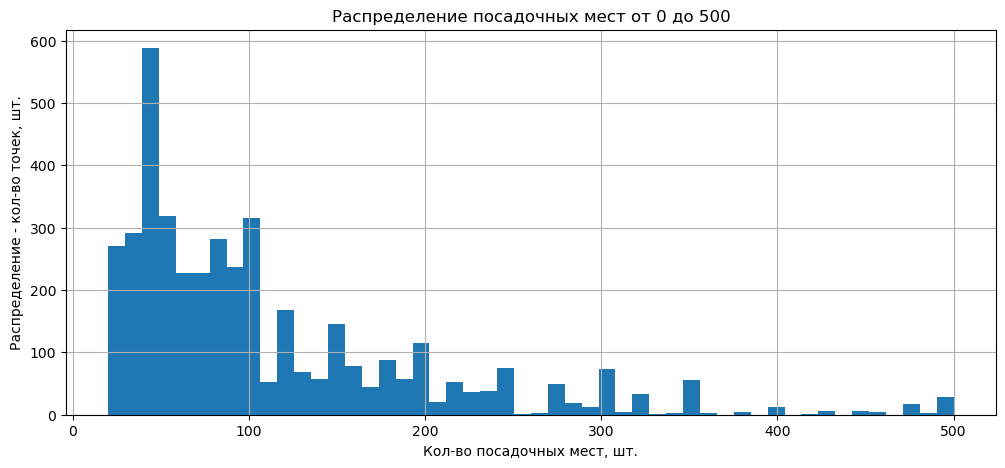

In [32]:
df['seats'].hist(figsize=(12,5), label='Посадочных мест от 20 до 500', bins=50, range=(20,500))
plt.xlabel('Кол-во посадочных мест, шт.')
plt.ylabel('Распределение - кол-во точек, шт.')
plt.title('Распределение посадочных мест от 0 до 500');

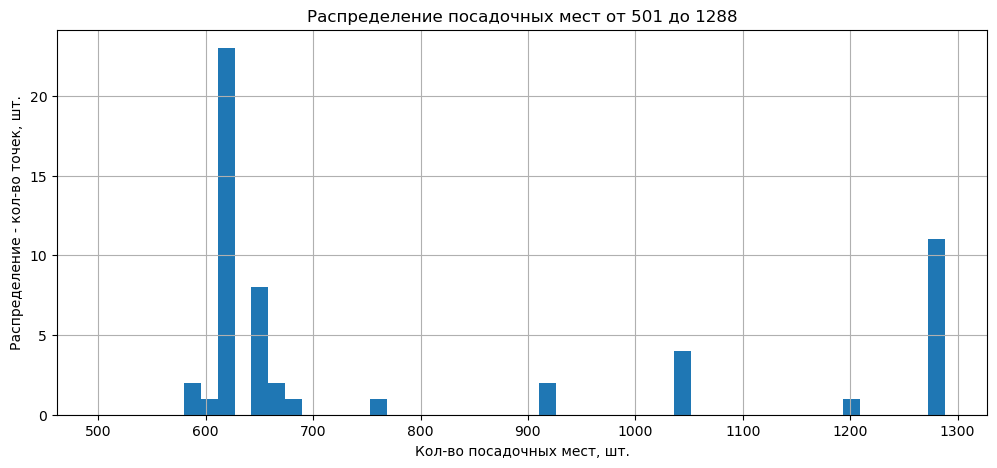

In [33]:
df['seats'].hist(figsize=(12,5), label='Посадочных мест от 501 до 1288', bins=50, range=(501,1288))
plt.xlabel('Кол-во посадочных мест, шт.')
plt.ylabel('Распределение - кол-во точек, шт.')
plt.title('Распределение посадочных мест от 501 до 1288');

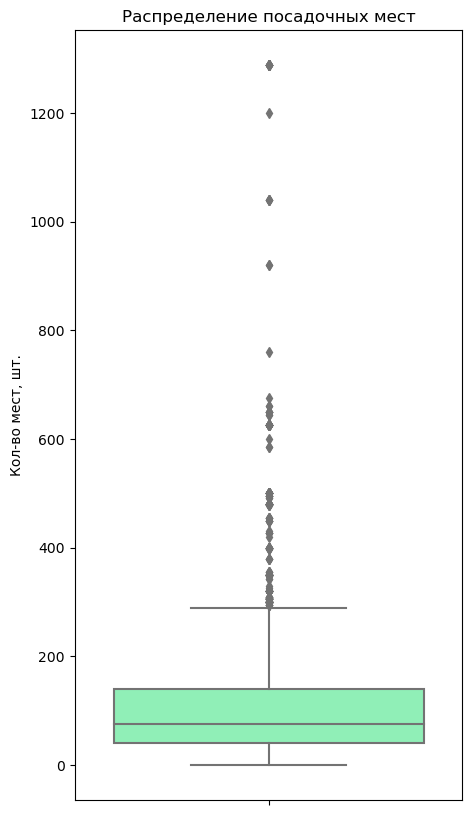

In [34]:
#График распределения всех посадочных мест
plt.figure(figsize=(5,10))
sns.boxplot(y='seats', data=df, palette='rainbow');
plt.ylabel('Кол-во мест, шт.')
plt.title('Распределение посадочных мест');

In [35]:
#определяем пропущенные значения
df.isna().sum()

name                    0
category                0
address                 0
district                0
hours                 529
lat                     0
lng                     0
rating                  0
price                5030
avg_bill             4532
middle_avg_bill      5197
middle_coffee_cup    7806
chain                   0
seats                3580
dtype: int64

После расммотрения всех колонок, у нас остались пропущеные значения. Удалять их небудем

**Добавим столбец с названием улицы**

In [36]:
# столбец street с названиями улиц из столбца с адресом.
words = ['улица','ул','переулок','шоссе','проспект','площадь','проезд','аллея','бульвар','набережная','тупик','линия','мкад','просек','парк', 'микрорайон', 'бульвар','набережная','сквер']

str_pat = r".*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+".format("|".join(words))

df["street"] = df["address"].str.extract(str_pat, flags=re.I)

In [37]:
df["address"].str.split(', ').str[1]

0                 улица дыбенко
1                 улица дыбенко
2            клязьминская улица
3       улица маршала федоренко
4           правобережная улица
                 ...           
8401          профсоюзная улица
8402      пролетарский проспект
8403           люблинская улица
8404           люблинская улица
8405        россошанский проезд
Name: address, Length: 8339, dtype: object

In [38]:
#Наличие пропусков столбце street
df["street"].isna().sum()

143

In [39]:
# Рассмотрим адреса заведений, где улицы остались пустыми 
df_null=df[df["street"].isna()]
df_null['address'].unique()

array(['москва, парк левобережный',
       'москва, ландшафтный заказник лианозовский',
       'москва, лианозовский парк культуры и отдыха',
       'москва, парк алтуфьево', 'москва, парк ангарские пруды',
       'москва, проектируемый проезд № 5265',
       'москва, парк этнографическая деревня бибирево',
       'москва, северный административный округ, головинский район',
       'москва, парк культуры и отдыха северное тушино',
       'москва, северо-западный административный округ, район северное тушино',
       'москва, парк дружбы', 'москва, ленинградское шоссе',
       'москва, северный административный округ, район левобережный, территория парка дружбы',
       'москва, коптевский бульвар д 18 а стр 1',
       'москва, грузинский сквер',
       'москва, северо-восточный административный округ, район отрадное',
       'москва, северо-восточный административный округ, останкинский район, выставка достижений народного хозяйства, кольцевая дорога',
       'москва, парк останкино',


В данных по улицам есть пустые строки. Это связано с тем, что не все адреса корректно записаны. некоторые заведения находятся в парках и не имеют точного адреса. Оставляем 143 заведения без улиц. Удалять адреса не будем

**Добавим столбец is_24 с обозначением, что заведение работает ежедневно и круглосуточно (24/7)**

In [41]:
word=['ежедневно, круглосуточно']
df['is_24'] = df['hours'].apply(lambda x: x in word)
df.head(10)

name         category  \
0                wowфли             кафе   
1        четыре комнаты         ресторан   
2                 хазри             кафе   
3  dormouse coffee shop          кофейня   
4             иль марко         пиццерия   
5          sergio pizza         пиццерия   
6           огни города          бар,паб   
7            mr. уголек  быстрое питание   
8           donna maria         ресторан   
9                готика             кафе   

                                   address                         district  \
0               москва, улица дыбенко, 7/1  Северный административный округ   
1       москва, улица дыбенко, 36, корп. 1  Северный административный округ   
2           москва, клязьминская улица, 15  Северный административный округ   
3      москва, улица маршала федоренко, 12  Северный административный округ   
4          москва, правобережная улица, 1б  Северный административный округ   
5             москва, ижорская улица, вл8б  Северный административный округ   
6    москва, клязьминская улица, 9, стр. 3  Северный административный округ   
7    москва, клязьминская улица, 9, стр. 3  Северный административный округ   
8  москва, дмитровское шоссе, 107, корп. 4  Северный административный округ   
9              москва, ангарская улица, 39  Северный административный округ   

                                               hours        lat        lng  \
0                             ежедневно, 10:00–22:00  55.878494  37.478860   
1                             ежедневно, 10:00–22:00  55.875801  37.484479   
2  пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...  55.889146  37.525901   
3                             ежедневно, 09:00–22:00  55.881608  37.488860   
4                             ежедневно, 10:00–22:00  55.881166  37.449357   
5                             ежедневно, 10:00–23:00  55.888010  37.509573   
6                  пн 15:00–04:00; вт-вс 15:00–05:00  55.890752  37.524653   
7  пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00...  55.890636  37.524303   
8                             ежедневно, 10:00–22:00  55.880045  37.539006   
9                             ежедневно, 12:00–00:00  55.879038  37.524487   

   rating          price                       avg_bill  middle_avg_bill  \
0     5.0            NaN                            NaN              NaN   
1     4.5  выше среднего       Средний счёт:1500–1600 ₽           1550.0   
2     4.6        средние         Средний счёт:от 1000 ₽           1000.0   
3     5.0            NaN  Цена чашки капучино:155–185 ₽              NaN   
4     5.0        средние         Средний счёт:400–600 ₽            500.0   
5     4.6        средние                            NaN              NaN   
6     4.4        средние             Средний счёт:199 ₽            199.0   
7     4.7        средние         Средний счёт:200–300 ₽            250.0   
8     4.8        средние          Средний счёт:от 500 ₽            500.0   
9     4.3        средние       Средний счёт:1000–1200 ₽           1100.0   

   middle_coffee_cup  chain  seats                   street  is_24  
0                NaN      0    NaN            улица дыбенко  False  
1                NaN      0    4.0            улица дыбенко  False  
2                NaN      0   45.0       клязьминская улица  False  
3              170.0      0    NaN  улица маршала федоренко  False  
4                NaN      1  148.0      правобережная улица  False  
5                NaN      0    NaN           ижорская улица  False  
6                NaN      0   45.0       клязьминская улица  False  
7                NaN      0   45.0       клязьминская улица  False  
8                NaN      0   79.0        дмитровское шоссе  False  
9                NaN      0   65.0          ангарская улица  False

In [42]:
df['is_24'].value_counts()

False    7616
True      723
Name: is_24, dtype: int64

In [43]:
# % круглосуточных заведений
round((723/df['is_24'].count())*100)

9

Выводы:
- При выполнениях предобработки данных, выявлены неявные 108 дубликатов
- Решено убрать 63 заведения с низким рейтингом <2 баллов. В большинстве случаев никакой информации о них нет, только адрес и оценка. Это мало информативно
- Большая часть значений расположена в диапазоне 0 - 300 мест. 
- Но здесь присутствуют и огромные значения аж до 1288 мест, но по таблице видно, что это вполне могут быть крупные столовые, банкетные залы и т.д. 
- Также присутствуют много заведений с малым кол-вом мест (от 1 до 10), и места с 0 - это скорее всего маленькие закусочные, кофе на вынос.
- Добавили столбец с информацией по улицам. популярные направления: проспект Мира, Профсоюзная улица, проспект Вернадского, Ленинский проспект, Ленинградский проспект
- Добавили столбец с круглосуточными заведениями. Их менее 9 %

## Анализ данных

**Количество объектов общественного питания по категориям: рестораны, кофейни, пиццерии, бары и так далее**

In [44]:
df_category=df.groupby('category')['category'].count().sort_values(ascending=False)
df_category

category
кафе               2346
ресторан           2030
кофейня            1409
бар,паб             760
пиццерия            632
быстрое питание     595
столовая            312
булочная            255
Name: category, dtype: int64

In [ ]:
fig = go.Figure()
pull = [0]*len(df_category)
pull[df_category.tolist().index(df_category.max())] = 0.2
fig.add_trace(go.Pie(values=df_category, labels=df_category.index, pull=pull, hole=0.9, ))
fig.update_layout(
    annotations=[dict(text='Распределение<br>заведений<br>по категориям', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

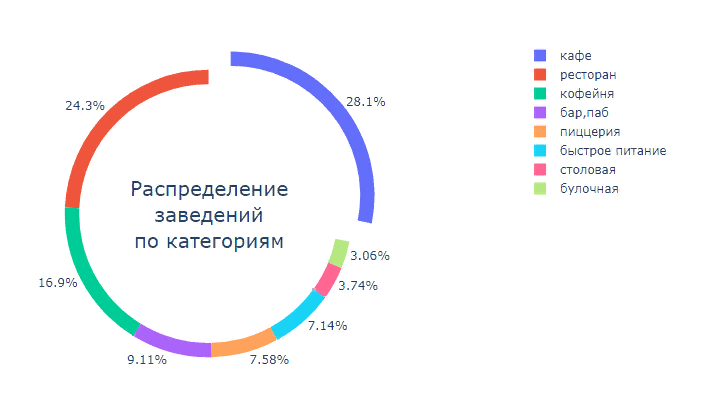

Больше всего кафе, разрыв от следующей категории составляет 3.8% -рестораны .Меньше всего столовых -3.74% и булочных- 3.06%

**Количество посадочных мест в местах по категориям: рестораны, кофейни, пиццерии, бары и так далее.**

In [46]:
df.groupby('category')['seats'].describe().sort_values(by='50%')

count        mean         std  min   25%   50%    75%  \
category                                                                  
булочная          147.0   89.993197   97.738363  0.0  25.5  50.0  120.0   
пиццерия          427.0   94.496487  112.282703  0.0  30.0  55.0  120.0   
кафе             1203.0   97.535328  118.261440  0.0  35.0  60.0  120.0   
быстрое питание   345.0   99.811594  106.837123  0.0  30.0  69.0  143.0   
столовая          162.0   99.623457  123.702409  0.0  40.0  75.0  116.0   
кофейня           750.0  111.234667  127.919496  0.0  40.0  80.0  144.0   
бар,паб           465.0  124.987097  145.361662  0.0  48.0  84.0  150.0   
ресторан         1260.0  121.946825  123.953678  0.0  48.0  86.0  150.0   

                    max  
category                 
булочная          625.0  
пиццерия         1288.0  
кафе             1288.0  
быстрое питание  1040.0  
столовая         1200.0  
кофейня          1288.0  
бар,паб          1288.0  
ресторан         1288.0

In [ ]:
fig = px.box(df, x='seats', y='category', color='category')
fig.update_layout(title_text= 'Распределение количества мест по категориям')
fig.update_layout(width=1000,height=600)
fig.update_layout(bargap=0.3)
fig.update_xaxes(title='Количество посадочных мест ')
fig.update_yaxes(title='Категории заведений')
fig.show()

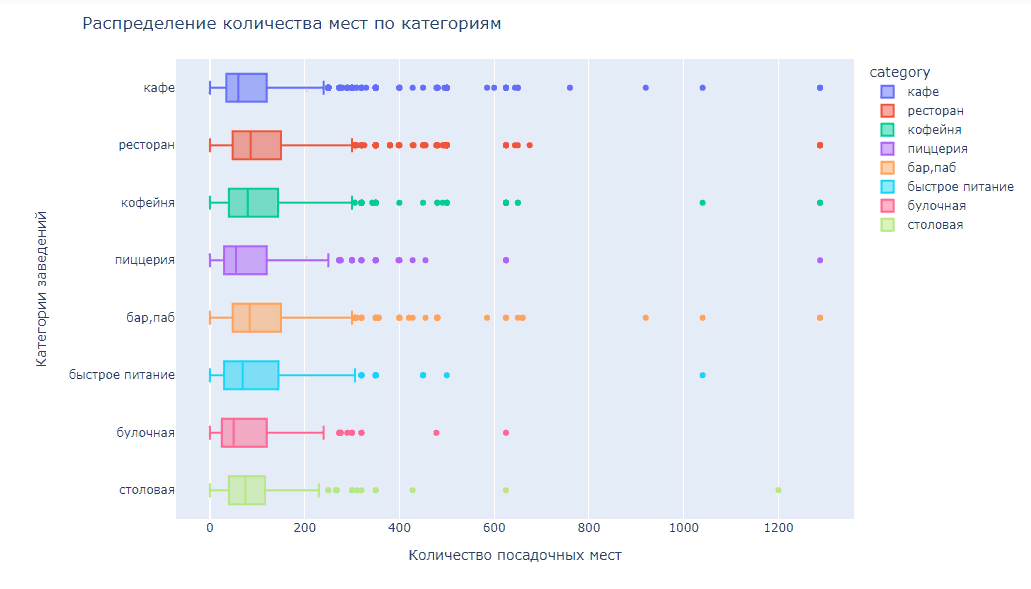

Среднее количество в заведениях не превышает 90 мест. Большое количество мест в ресторанах, бар, пабах, столовых. Подобные заведения рассчитаны на проведения праздников. Для булочной, пиццерии и кафе достаточно мест не более 60 мест.

**Соотношение сетевых и несетевых заведений в датасете**

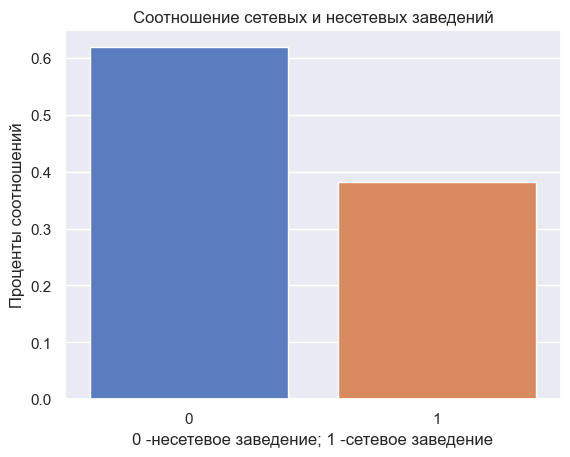

In [48]:
sns.set()
chains = df.groupby('chain')['category'].count().reset_index().rename(columns={'category':'counts'})
chains['ratio'] = chains['counts'] / chains['counts'].sum()
sns.barplot(x='chain',y='ratio', data=chains,palette="muted")
plt.title('Соотношение сетевых и несетевых заведений')
plt.xlabel('0 -несетевое заведение; 1 -сетевое заведение')
plt.ylabel('Проценты соотношений')
plt.show()

In [49]:
chains

chain  counts     ratio
0      0    5158  0.618539
1      1    3181  0.381461

Около 38% заведений являются сетевыми. Большинство заведений 62% не входят в сети заведений. Это хорошо для развития своего стилизованного заведения.

**Категории заведений, которые являются сетевыми**

In [50]:
category_chain =(df.groupby(['category','chain'])['name'].count()
                .reset_index()
                .rename(columns={'name':'counts'})
                .merge(df.groupby('category').chain.count(), on='category',suffixes=('','_total')))
category_chain['percent'] = round((category_chain.counts / category_chain.chain_total) * 100)
is_chain= category_chain.query('chain== 1')
is_chain.sort_values(by='percent', ascending=False)

category  chain  counts  chain_total  percent
3          булочная      1     157          255     62.0
11         пиццерия      1     330          632     52.0
9           кофейня      1     717         1409     51.0
5   быстрое питание      1     229          595     38.0
13         ресторан      1     722         2030     36.0
7              кафе      1     770         2346     33.0
15         столовая      1      88          312     28.0
1           бар,паб      1     168          760     22.0

In [ ]:
# функция для построения столбчатого графика
def show_me(data, col1, col2, name):
    fig = px.bar(data, x= col1, y=col2, color= col1, text=col2)
    fig.update_layout(xaxis={'categoryorder':'total descending'})
    fig.update_xaxes(tickangle=45)
    fig.update_layout(title= name)
    fig.update_xaxes(title='Заведение')
    fig.update_yaxes(title='Количество')
    fig.show()
    
show_me(is_chain, 'category', 'percent', 'Распределение количества заведений по сетям')

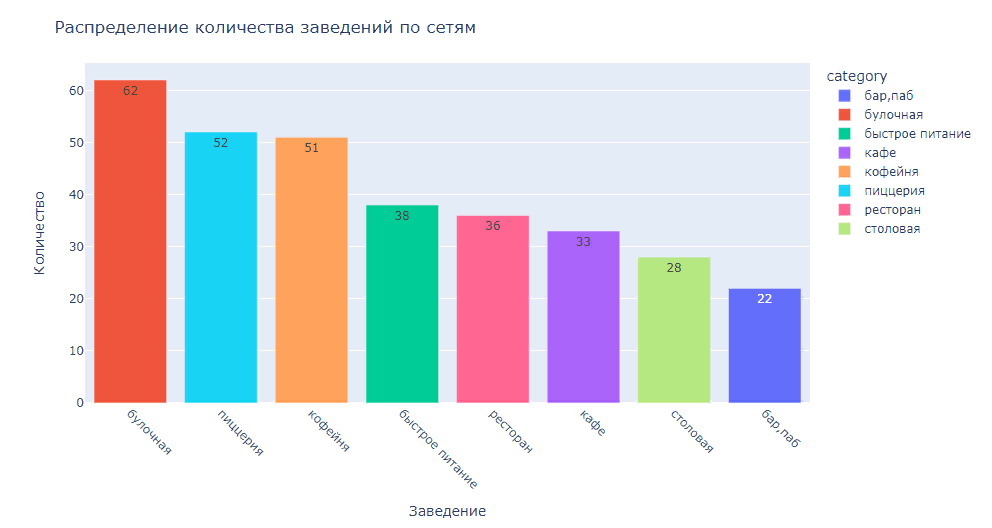

Среди сетевых заведений популярны булочные, пиццерия, кофейня. Интересно это тем, что данные заведения представляют выпечку и кондитерские изделия. Например, в ленинградской области есть булочные Ф.Вольчека. У них отдельные цеха для производства, а в булочные поступает готовый продукт или полуфабрикат. Данная схема эффективна, поэтому процент сетевых заведений  высок в данном направлении

**Рассмотрим топ-15 популярных сетей в Москве. Отобразим общее количество сетевых заведений и количество сетевых заведений каждой категории по районам.**

In [52]:
#топ-15 популярных сетей в Москве
df1=df.query('chain== 1')
top_15_place = pd.DataFrame(df1.groupby('name')['chain'].count().sort_values(ascending=False))
top_15_place=top_15_place.reset_index().head(15)
top_15_place

name  chain
0                           шоколадница    120
1                        домино'с пицца     76
2                            додо пицца     74
3                      one price coffee     71
4                          яндекс лавка     68
5                                 cofix     64
6                                 prime     50
7                            хинкальная     44
8                              кофепорт     41
9   кулинарная лавка братьев караваевых     39
10                              теремок     38
11                              чайхана     36
12                             cofefest     32
13                              буханка     32
14                                му-му     27

In [53]:
# проверим яндекс лавку.Они себя позиционируют как доставка еды, а в датасете числятся как рестораны
df.query('name== "яндекс лавка"').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 162 to 7980
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               68 non-null     object 
 1   category           68 non-null     object 
 2   address            68 non-null     object 
 3   district           68 non-null     object 
 4   hours              67 non-null     object 
 5   lat                68 non-null     float64
 6   lng                68 non-null     float64
 7   rating             68 non-null     float64
 8   price              0 non-null      object 
 9   avg_bill           0 non-null      object 
 10  middle_avg_bill    0 non-null      float64
 11  middle_coffee_cup  0 non-null      float64
 12  chain              68 non-null     int64  
 13  seats              34 non-null     float64
 14  street             68 non-null     object 
 15  is_24              68 non-null     bool   
dtypes: bool(1), float64(6), 

In [51]:
df.query('name== "яндекс лавка" and seats > 1 ').count()

name                 30
category             30
address              30
district             30
hours                29
lat                  30
lng                  30
rating               30
price                 0
avg_bill              0
middle_avg_bill       0
middle_coffee_cup     0
chain                30
seats                30
street               30
is_24                30
dtype: int64

Среди представленного списка, есть сети заведений популярные по всей стране. У Яндекс лавки есть 68 заведений, и в 30 из них есть места. Относятся все заведения к категории ресторан. Понимая, что Яндекс лавка занимается доставкой продуктов, и рассмотрев несколько заведений из 30 (в которых есть места) принято решение удалить строчки из датасета. Также цены отсутствуют во всех заведениях Среди лидирующих заведений есть 2 сети пиццерий. Видимо то, что приготовление пиццы очень быстрое это популярно. Очень хорошая идея с пиццерией в том, что используются заготовки в разных пиццах. Отметим также популярность заведений, базирующихся на кофейных напитках и десертах

In [54]:
# удаление строк яндекс лавка из датафрейм 
df = df[df.name != "яндекс лавка" ]

In [55]:
# создадим новый датафрейм, в который входят популярные сети 
names_place= ['шоколадница', "домино'с пицца", 'додо пицца', 'one price coffee',\
              'cofix', 'prime', 'хинкальная','кофепорт',\
              'кулинарная лавка братьев караваевых','теремок', 'чайхана', 'cofefest','му-му', 'буханка' ]
df_top_15 = df1[df1['name'].isin(names_place)]
df_top_15.head()

name  category                                  address  \
13         буханка  булочная     москва, базовская улица, 15, корп. 1   
23         буханка  булочная           москва, лобненская улица, 13к2   
32      додо пицца  пиццерия   москва, коровинское шоссе, 23, корп. 1   
34  домино'с пицца  пиццерия  москва, клязьминская улица, 11, корп. 4   
46        cofefest   кофейня     москва, улица маршала федоренко, 6с1   

                           district                   hours        lat  \
13  Северный административный округ  ежедневно, 08:00–22:00  55.877007   
23  Северный административный округ  ежедневно, 08:00–22:00  55.888421   
32  Северный административный округ  ежедневно, 09:00–23:00  55.877388   
34  Северный административный округ  ежедневно, 10:00–23:00  55.886963   
46  Северный административный округ       пн-пт 09:00–19:00  55.879934   

          lng  rating price               avg_bill  middle_avg_bill  \
13  37.504980     4.8   NaN                    NaN              NaN   
23  37.527106     4.7   NaN                    NaN              NaN   
32  37.523334     4.3   NaN     Средний счёт:328 ₽            328.0   
34  37.523518     4.2   NaN  Средний счёт:от 500 ₽            500.0   
46  37.492522     3.6   NaN                    NaN              NaN   

    middle_coffee_cup  chain  seats                   street  is_24  
13                NaN      1  180.0          базовская улица  False  
23                NaN      1    NaN         лобненская улица  False  
32                NaN      1   46.0        коровинское шоссе  False  
34                NaN      1  247.0       клязьминская улица  False  
46                NaN      1    NaN  улица маршала федоренко  False

In [ ]:
# График для построения 15 популярных заведений
show_me(top_15_place, 'name', 'chain', 'Топ-15 популярных сетей в Москве')

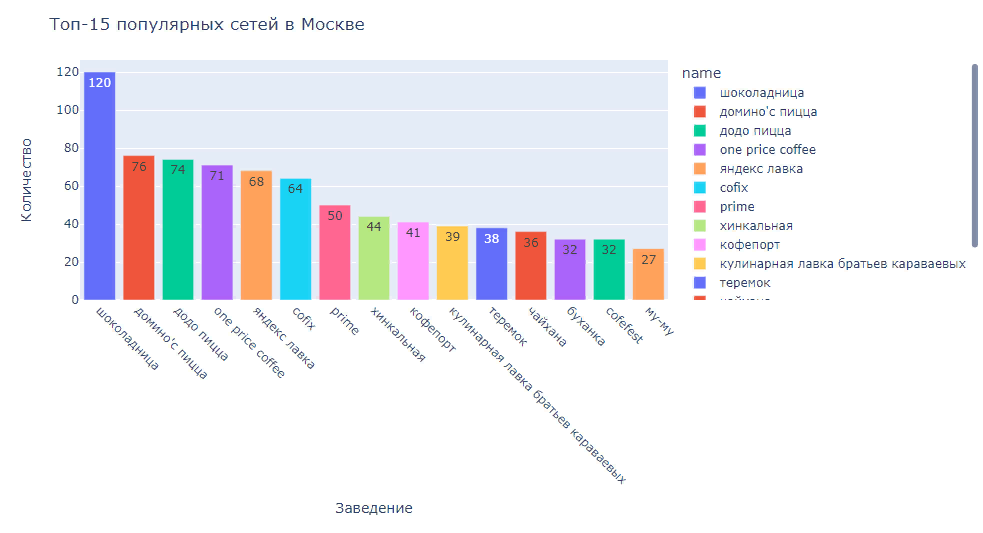

In [62]:
# Общее количество сетевых заведений по районам
place_in_district= df_top_15.groupby(['district']).agg({'name':'count'}).sort_values(by='name',ascending=False).reset_index()
place_in_district['%']= round((place_in_district['name']/place_in_district['name'].sum())*100)
place_in_district

district  name     %
0       Центральный административный округ   210  28.0
1          Северный административный округ    84  11.0
2          Западный административный округ    79  11.0
3  Северо-Восточный административный округ    78  10.0
4             Южный административный округ    76  10.0
5         Восточный административный округ    67   9.0
6      Юго-Западный административный округ    59   8.0
7     Юго-Восточный административный округ    48   6.0
8   Северо-Западный административный округ    43   6.0

In [ ]:
# общего количества сетевых заведений по районам
def show_me_1(data, col1, col2, name, name1, name2):
    fig = px.bar(data, x= col1, y=col2, color= col1, text=col2)
    fig.update_layout(xaxis={'categoryorder':'total descending'})
    fig.update_xaxes(tickangle=45)
    fig.update_layout(title= name)
    fig.update_xaxes(title=name1)
    fig.update_yaxes(title=name2)
    fig.show()
#график общего количества сетевых заведений по районам    
show_me_1(place_in_district, 'district', 'name', 'Распределение количества сетевых заведений по округам','Округ', 'Количество' )

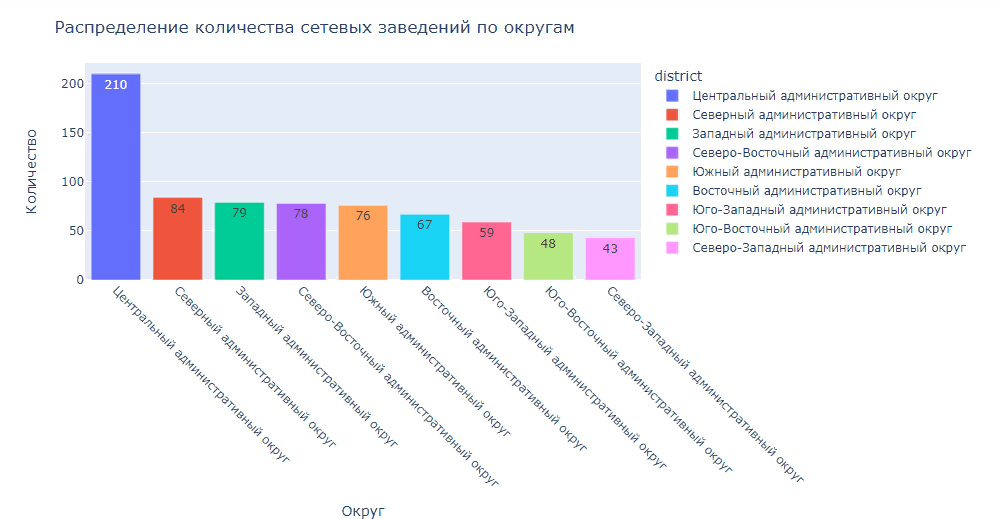

Нет ничего удивительного, что ЦАО лидирует по количеству в 2 раза больше. Люди работают в основном в центре тут же обедают и данный округ будет более платежеспособным

In [65]:
#Количество сетевых заведений каждой категории по районам
data_grouped = df_top_15.groupby(['district','category']).agg({'category':'count'})
data_grouped.columns = ['count']
data_grouped=data_grouped.reset_index()
data_grouped['%'] = round((data_grouped['count']/data_grouped['count'].sum())*100)
data_grouped.sort_values(by='%',ascending=False).head(10)

district  category  count     %
35       Центральный административный округ   кофейня     94  13.0
37       Центральный административный округ  ресторан     55   7.0
34       Центральный административный округ      кафе     47   6.0
11          Западный административный округ   кофейня     41   6.0
16          Северный административный округ   кофейня     40   5.0
22  Северо-Восточный административный округ   кофейня     37   5.0
52             Южный административный округ   кофейня     33   4.0
4          Восточный административный округ   кофейня     30   4.0
5          Восточный административный округ  пиццерия     20   3.0
28   Северо-Западный административный округ   кофейня     19   3.0

In [ ]:
# График количество заведений каждой категории по районам
fig = px.histogram(data_grouped, x='district',y= 'count', labels={'category':'Категория заведения'},color="category",log_y=False)
fig.update_yaxes(tickfont=dict(size=20))
fig.update_layout(title_text= 'Количество заведений каждой категории по районам',font=dict(family="Rockwell",size=15, color="black"))
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_layout(width=1000,height=600)
fig.update_layout(bargap=0.3)
fig.update_xaxes(title='Округ')
fig.update_yaxes(title='Количество')
fig.show()

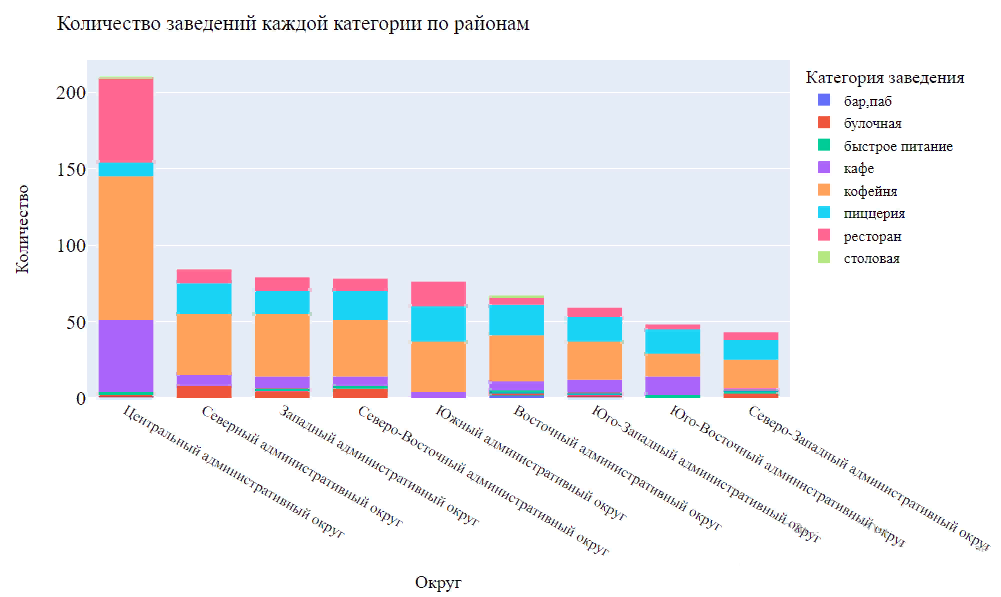

- На графике видно, что самым популярным округом является ЦАО. 
- Менее популярным округом будет СЗАО и ЮВАО. Среди остальных районов, распределение равномерное. 
- Из категорий выделяются заведения категории кафе и кофейни.  
- Хоть и в СЗАО не большое количество заведений, но пиццерия выглядит тут актуальнее. Можно предположить, что этот район с большим количеством жилой застройки. 
- В ЦАО видно рестораны имеют одну из главных позиций.
- Стоит отметить что пиццерии почти равномерно распредены по городу, только в ЦАО они в количестве 9 штук.


**Общее количество заведений и количество заведений каждой категории по районам.**

In [67]:
# Общее количество заведений по районам
place= df.groupby(['district']).agg({'name':'count'}).sort_values(by='name',ascending=False).reset_index()
place

district  name
0       Центральный административный округ  2237
1          Северный административный округ   893
2             Южный административный округ   874
3  Северо-Восточный административный округ   868
4          Западный административный округ   834
5         Восточный административный округ   783
6     Юго-Восточный административный округ   690
7      Юго-Западный административный округ   688
8   Северо-Западный административный округ   404

Из 12 административных округов представлены 9

In [68]:
#Количество заведений каждой категории по районам
data = df.groupby(['district','category']).agg({'category':'count'})
data.columns = ['count']
data=data.reset_index()
data

district         category  count
0   Восточный административный округ          бар,паб     53
1   Восточный административный округ         булочная     25
2   Восточный административный округ  быстрое питание     71
3   Восточный административный округ             кафе    270
4   Восточный административный округ          кофейня    105
..                               ...              ...    ...
67      Южный административный округ             кафе    261
68      Южный административный округ          кофейня    130
69      Южный административный округ         пиццерия     73
70      Южный административный округ         ресторан    190
71      Южный административный округ         столовая     44

[72 rows x 3 columns]

In [ ]:
# График количество заведений каждой категории по районам
fig = px.histogram(data, x='district',y= 'count', labels={'category':'Категория заведения'},color="category",log_y=False)
fig.update_yaxes(tickfont=dict(size=20))
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_layout(title_text= 'Количество заведений каждой категории по районам',font=dict(family="Rockwell",size=15, color="black"))
fig.update_layout(width=1000,height=600)
fig.update_layout(bargap=0.3)
fig.update_xaxes(title='Округ')
fig.update_yaxes(title='Количество')
fig.show()

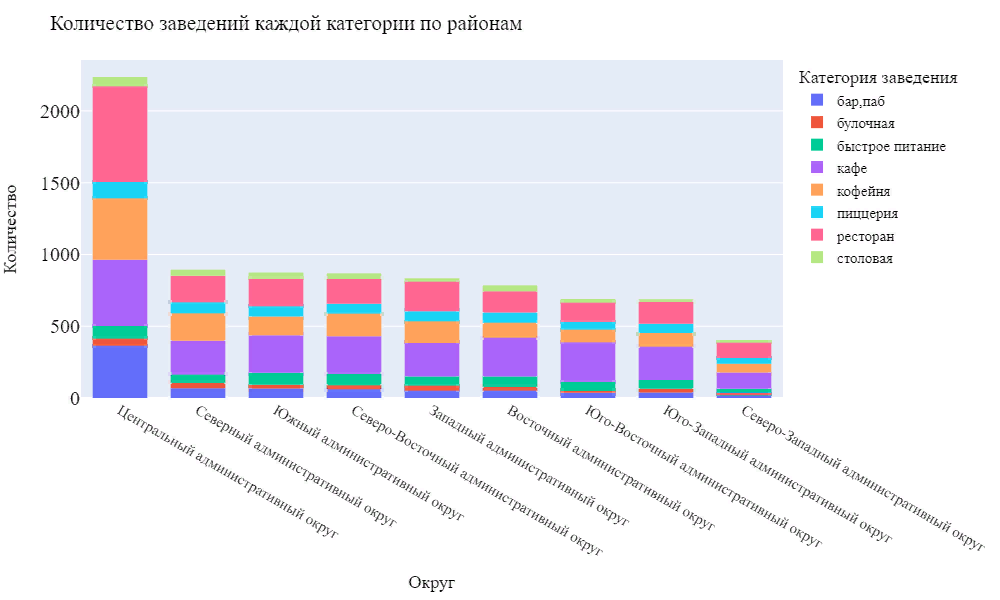

Среди округов лидирует с большим отрывом ЦАО. Наглядно видно, что рестораны лидируют после идут кофейни и кафе. В СЗАО представлено самое малое количество заведений и тут кафе более актуальны. Так же кафе лидируют и во всех других округах

**Распределение средних рейтингов по категориям заведений.**

In [70]:
df_median_rating = df.groupby(['category'])['rating'].describe()
df_median_rating=df_median_rating.reset_index()
df_median_rating

category   count      mean       std  min  25%  50%  75%  max
0          бар,паб   760.0  4.408026  0.286639  2.8  4.3  4.4  4.6  5.0
1         булочная   255.0  4.280000  0.339105  2.2  4.2  4.3  4.4  5.0
2  быстрое питание   595.0  4.084706  0.477421  2.1  3.9  4.2  4.3  5.0
3             кафе  2346.0  4.161679  0.466391  2.1  4.0  4.2  4.4  5.0
4          кофейня  1409.0  4.284173  0.349266  2.2  4.1  4.3  4.4  5.0
5         пиццерия   632.0  4.306487  0.309653  2.1  4.2  4.3  4.4  5.0
6         ресторан  1962.0  4.323700  0.322904  2.1  4.2  4.3  4.5  5.0
7         столовая   312.0  4.240064  0.348765  2.5  4.1  4.3  4.4  5.0

In [ ]:
#распределение средних рейтингов по категориям заведений.
def show_me(data, col1, col2, name):
    fig = px.bar(data, x= col1, y=col2, color= col1, text=col2)
    fig.update_layout(xaxis={'categoryorder':'total descending'})
    fig.update_xaxes(tickangle=45)
    fig.update_layout(title= name)
    fig.update_xaxes(title='Категория заведения')
    fig.update_yaxes(title='Средний рейтинг')
    fig.show()
    
show_me(df_median_rating, 'category', '50%', 'Распределение средних рейтингов по категориям заведений')

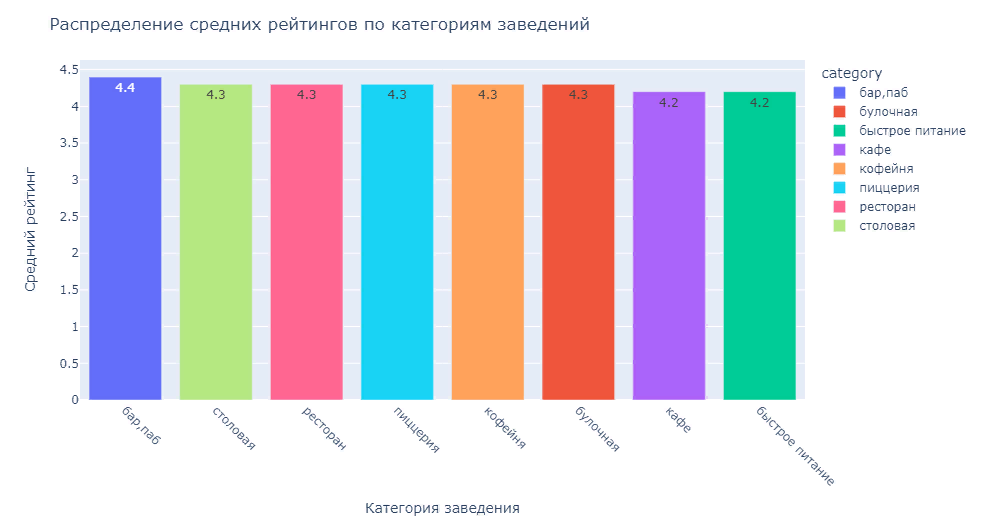

На графике видно, что средний рейтинг у всех категорий не сильно различается. Разницы от того рассматриваем мы среднее число или медианное ничего не изменится. Так же стоит отметить что, вначале работы, при обработке данных, были удалены заведения с рейтингом ниже 2. Они бы исказили полученные данные


**Фоновая картограмма (хороплет) со средним рейтингом заведений каждого района.**

In [72]:
rating_df = df.groupby('district', as_index=False)['rating'].agg('median')
rating_df

district  rating
0         Восточный административный округ     4.3
1          Западный административный округ     4.3
2          Северный административный округ     4.3
3  Северо-Восточный административный округ     4.3
4   Северо-Западный административный округ     4.3
5       Центральный административный округ     4.4
6     Юго-Восточный административный округ     4.2
7      Юго-Западный административный округ     4.3
8             Южный административный округ     4.3

In [ ]:
# читаем файл и сохраняем в переменной
with open('/datasets/admin_level_geomap.geojson', 'r') as f:
    geo_json = json.load(f)

print(json.dumps(geo_json, indent=2, ensure_ascii=False, sort_keys=True))

In [ ]:
# загружаем JSON-файл с границами округов Москвы
state_geo = '/datasets/admin_level_geomap.geojson'
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=rating_df,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Медианный рейтинг заведений по районам',
).add_to(m)

# выводим карту
m

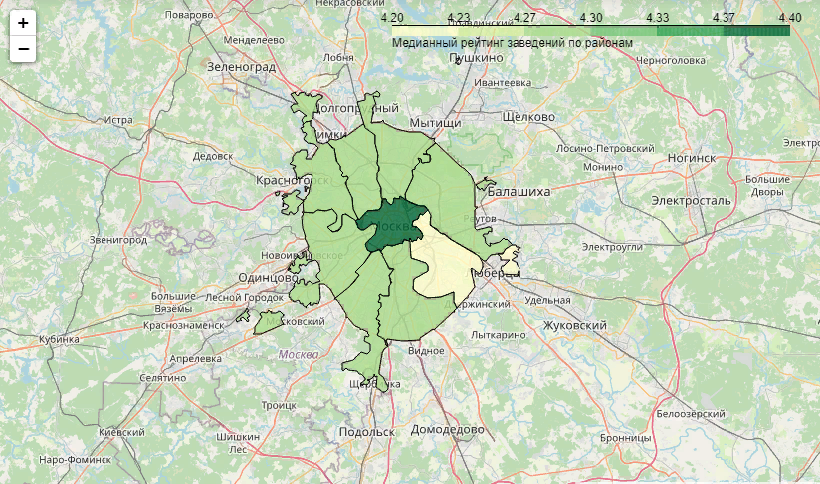

Центральный район выделяется из общего числа всего 0.1. В данном округе большей популярностью пользуются рестораны, поэтому и рейтинг будет выше. К ресторану предъявляются высокие требования, а также оригинальность заведений повышает рейтинг заведения. Стоит отметить тот факт, что все округа держат высокую планку в оценке своих заведений 


**Все заведения датасета на карте с помощью кластеров средствами библиотеки folium.**

In [ ]:
# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# пишем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его на карту
def create_marker(row):
    Marker([row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}"
    ).add_to(m)

# применяем функцию для создания маркера ко всем строкам датафрейма
df.apply(create_marker, axis=1)
    
# выводим карту
# m

**Топ-15 улиц по количеству заведений. График распределения количества заведений и их категорий по этим улицам.**

In [75]:
top_15_street = df.groupby(['street']).agg({'street':'count'})
top_15_street.columns = ['count']
top_15_street = top_15_street.reset_index().sort_values(by='count', ascending=False).head(15)
top_15_street

street  count
781            проспект мира    182
785        профсоюзная улица    119
778     проспект вернадского    106
508       ленинский проспект    104
506   ленинградский проспект     95
361        дмитровское шоссе     85
442          каширское шоссе     76
291         варшавское шоссе     73
507      ленинградское шоссе     68
583                     мкад     65
527         люблинская улица     59
1012          улица вавилова     55
500     кутузовский проспект     54
1168    улица миклухо-маклая     48
792          пятницкая улица     48

In [76]:
# создадим новый датафрейм, в который входят популярные улицы
names_street= ['проспект мира', 'профсоюзная улица', 'проспект вернадского','ленинский проспект', 'ленинградский проспект',\
              'дмитровское шоссе', 'каширское шоссе', 'варшавское шоссе','ленинградское шоссе', 'люблинская улица',\
              'улица вавилова','кутузовский проспект', 'улица миклухо-маклая', 'пятницкая улица','мкад']
df_top_15_street = df[df['street'].isin(names_street)]

In [77]:
#Количество заведений каждой категории по улицам
df_street = df_top_15_street.groupby(['street','category']).agg({'category':'count'})
df_street.columns = ['count']
df_street=df_street.reset_index()
df_street.head()

street         category  count
0  варшавское шоссе          бар,паб      6
1  варшавское шоссе  быстрое питание      7
2  варшавское шоссе             кафе     17
3  варшавское шоссе          кофейня     14
4  варшавское шоссе         пиццерия      4

In [ ]:
# График количество заведений каждой категории по популярным улицам
fig = px.histogram(df_street, x='street',y= 'count', labels={'category':'Категория заведения'},color="category",log_y=False)
fig.update_yaxes(tickfont=dict(size=20))
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_layout(title_text= 'Количество заведений каждой категории по самым популярным улицам',font=dict(family="Rockwell",size=15, color="black"))
fig.update_layout(width=1000,height=600)
fig.update_layout(bargap=0.3)
fig.update_xaxes(title='Улицы')
fig.update_yaxes(title='Количество заведений')
fig.show()

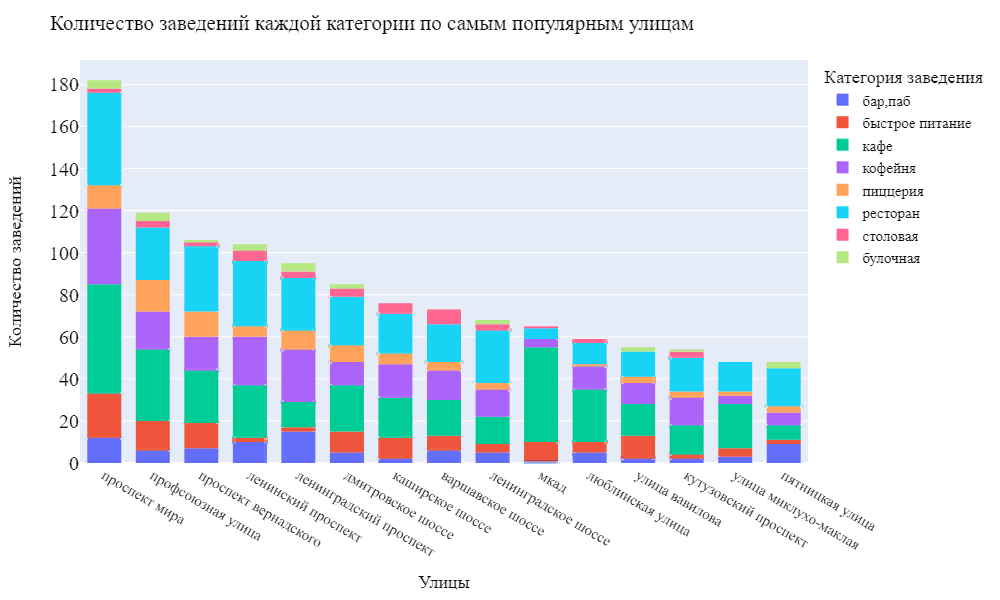

Проспект мира является главной улицей общественного питания. Это может быть связано с тем что по проспекту мира находится ВДНХю
Можно заметить, что больше всего заведений на самых длинных улицах, огромных проспектах, шоссе, разбегающихся от Садового кольца к краям города и проходящих по нескольким районам. Выделяется сравнительно небольшая Пресненская набережная - на этом участке берега Москвы-реки расположен Москва-Сити.

**Улицы, на которых находится только один объект общепита.**

In [79]:
print('Число улиц с одним объектом общественного питания =', sum(df.groupby('street')['name'].count().values==1))

Число улиц с одним объектом общественного питания = 419


In [80]:
low_streets = df.groupby('street')['name'].count().sort_values(ascending=True).reset_index().query('name == 1')
# переименуем столбцы
low_streets.set_axis(['street', 'objects'], axis = 'columns', inplace=True)

# добавим информацию о районах
low_streets = low_streets.merge(df, on='street', how='left')
low_streets['street'].unique()

array(['1-й автозаводский проезд', 'новороссийская улица',
       'новосущёвская улица', 'новощукинская улица',
       'новоясеневский тупик', 'одинцовская улица',
       'октябрьский переулок', 'ордынский тупик', 'оренбургская улица',
       'орловский переулок', 'оршанская улица', 'отрадный проезд',
       'павелецкая набережная', 'панкратьевский переулок',
       'парусный проезд', 'певческий переулок', 'новопоселковая улица',
       'переведеновский переулок', 'новомосковская улица',
       'новгородская улица', 'малый патриарший переулок',
       'малый толмачёвский переулок', 'мансуровский переулок',
       'медовый переулок', 'мерзляковский переулок', 'миусская площадь',
       'михайловский проезд', 'молдавская улица',
       'москворецкая набережная', 'московская улица',
       'московский проспект', 'мурановская улица', 'мясницкий проезд',
       'нащокинский переулок', 'новая улица', 'новолучанская улица',
       'малый николопесковский переулок', 'перекопская улица',
      

Если заведений не больше 1, то это будет скорее всего проезд, переулок или очень короткая улица.

**Расчет медианы среднего чека для каждого района.Построение фоновой картограммы (хороплет) с полученными значениями для каждого района.**

In [81]:
df_bill = df[df['middle_avg_bill'].notna()]

In [82]:
bill_df = df_bill.groupby('district', as_index=False)['middle_avg_bill'].agg('median')
bill_df

district  middle_avg_bill
0         Восточный административный округ            600.0
1          Западный административный округ           1000.0
2          Северный административный округ            650.0
3  Северо-Восточный административный округ            500.0
4   Северо-Западный административный округ            700.0
5       Центральный административный округ           1000.0
6     Юго-Восточный административный округ            450.0
7      Юго-Западный административный округ            600.0
8             Южный административный округ            500.0

In [ ]:
# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=bill_df,
    columns=['district', 'middle_avg_bill'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Медианный рейтинг заведений по районам',
).add_to(m)

# выводим карту
m

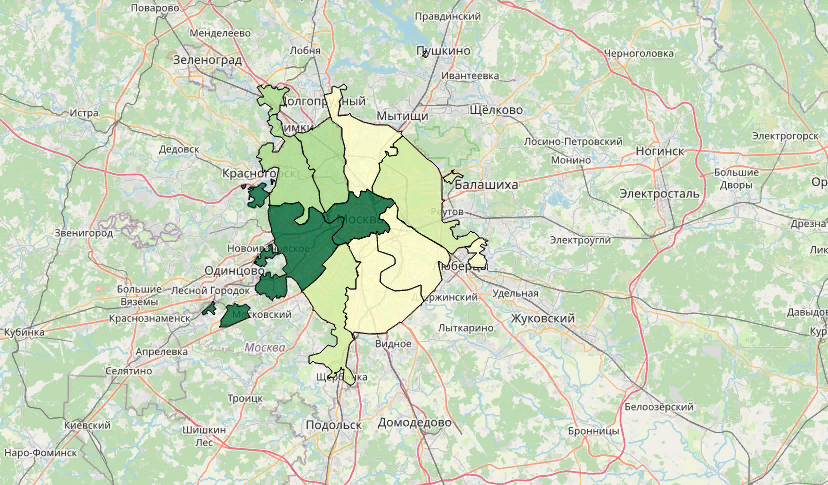

На карте видно 2 доминирующих округа. Это ЦОА и ЗАО. На западном административном округе находится элитная застройка. Поэтому и цены соответствуют. А в центре цены всегда будут выше. Таким образом, не удаленность от цетра важна, а престижность.


**Взаимосвязь между округами и круглосуточными заведениями**

In [83]:
df_24=df.query('is_24 == True')
df_24.head()

name  category                                   address  \
10      great room bar   бар,паб            москва, левобережная улица, 12   
17  чайхана беш-бармак  ресторан  москва, ленинградское шоссе, 71б, стр. 2   
19             пекарня  булочная                москва, ижорский проезд, 5   
24          drive café      кафе               москва, улица дыбенко, 9ас1   
49             2u-ту-ю  пиццерия                москва, ижорская улица, 8а   

                           district                     hours        lat  \
10  Северный административный округ  ежедневно, круглосуточно  55.877832   
17  Северный административный округ  ежедневно, круглосуточно  55.876908   
19  Северный административный округ  ежедневно, круглосуточно  55.887969   
24  Северный административный округ  ежедневно, круглосуточно  55.879992   
49  Северный административный округ  ежедневно, круглосуточно  55.886160   

          lng  rating    price                    avg_bill  middle_avg_bill  \
10  37.469171     4.5  средние  Цена бокала пива:250–350 ₽              NaN   
17  37.449876     4.4  средние      Средний счёт:350–500 ₽            425.0   
19  37.515688     4.4      NaN                         NaN              NaN   
24  37.481571     4.0      NaN                         NaN              NaN   
49  37.508784     2.7      NaN          Средний счёт:900 ₽            900.0   

    middle_coffee_cup  chain  seats               street  is_24  
10                NaN      0  102.0   левобережная улица   True  
17                NaN      0   96.0  ленинградское шоссе   True  
19                NaN      1    NaN      ижорский проезд   True  
24                NaN      1    NaN        улица дыбенко   True  
49                NaN      0    NaN       ижорская улица   True

In [84]:
df_is_24 = df_24.groupby('district', as_index=False)['is_24'].count()
df_is_24

district  is_24
0         Восточный административный округ     94
1          Западный административный округ     71
2          Северный административный округ     71
3  Северо-Восточный административный округ     73
4   Северо-Западный административный округ     42
5       Центральный административный округ    131
6     Юго-Восточный административный округ     89
7      Юго-Западный административный округ     72
8             Южный административный округ     72

In [ ]:
# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=df_is_24,
    columns=['district', 'is_24'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Количество ночных заведений по районам',
).add_to(m)

# выводим карту
m

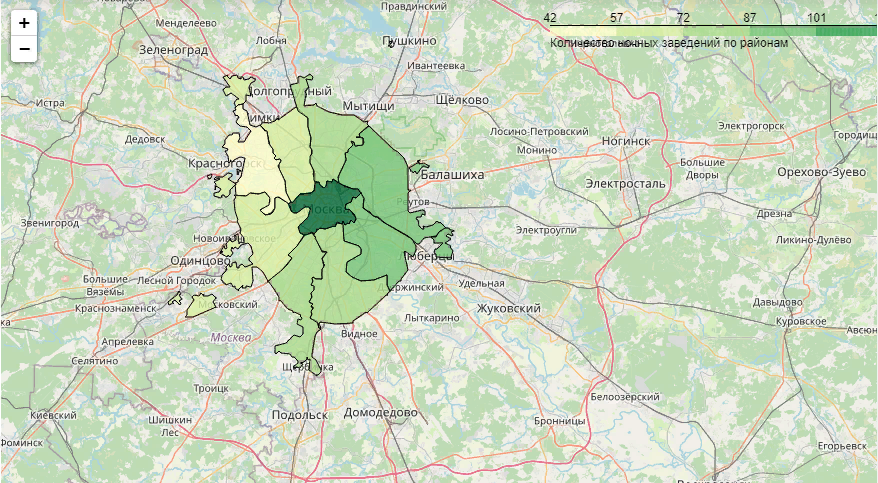

Центр является месом притяжения ночных заведений. Различие значительное

**Выводы**
- Большая часть заведений — это кафе -28,1% и рестораны - 24.3%. Меньше столовых -3.74% и булочных- 3.06%
- Среднее количество мест в заведениях не превышает 90. Большое количество мест в ресторанах, бар, пабах, столовых. Подобные заведения рассчитаны на проведения праздников. Для булочной, пиццерии и кафе достаточно не более 60 мест.


- Около 38% заведений являются сетевыми. 
- Среди сетевых заведений популярны булочные, пиццерии, кофейни. Интересно это тем, что данные заведения представляют выпечку, кондитерские изделия и кофейные напитки. Самая крупная сеть 120 точек -шоколадница, 76 -домино'с пицца, 74 -додо пицца, 71-one price coffee.
- Среди лидирующих заведений есть 2 сети пиццерий. Видимо то, что приготовление пиццы очень быстрое - это популярно. Очень хорошая идея с пиццерией в том, что используются заготовки в разных пиццах. Отметим также популярность заведений, базирующихся на кофейных напитках и десертах
- В центре представлено 28% сетевых заведений от общего числа. Люди работают в основном в центре тут же обедают и данный округ будет более платежеспособным.
- Менее популярным округом будет СЗАО -6% и ЮВАО -6%.
- В сетевых заведениях по категориям выделяются кафе и кофейни.
- в СЗАО не большое количество сетей, пиццерии тут актуальнее. Можно предположить, что этот район с большим количеством жилой застройки. В ЦАО кофейни занимают лидирующую позицию в сегменте - 13% от общего числа всех сетевых заведений.
- Стоит отметить что пиццерии почти равномерно распроданы по городу, только в ЦАО меньше всего -1% от общего числа всех заведений, например, в СЗАО - 3 %. Либо у людей запросы на другой продукт в данном районе, либо аренда в центре дорогая и не выгодна.


- Средний рейтинг у всех категорий не сильно различается. Центральный район выделяется из общего числа всего 0.1. В данном округе большей популярностью пользуются рестораны, поэтому и рейтинг выше. К ресторану предъявляются высокие требования. Замечателен тот факт, что все округа держат высокую планку в оценке своих заведений


- Проспект мира является главной улицей общественного питания. Это может быть связано с тем что около проспекта мира находится ВДНХ. Можно заметить, что больше всего заведений на самых длинных улицах, огромных проспектах, шоссе, разбегающихся от Садового кольца к краям города и проходящих по нескольким районам. Выделяется сравнительно небольшая Пресненская набережная - на этом участке берега Москвы-реки расположен Москва-Сити.
- Если заведений не больше 1 на улице, то это будет скорее всего проезд, переулок или очень короткая улица. Что актуально для исторической части города 


- По среднему чеку доминирует - ЦОА и ЗАО. На западном административном округе находится элитная застройка. Поэтому и цены соответствуют. А в центре цены всегда высоки, так как это и туристическое направление.


- Наибольшее количество круглосуточных заведении находятся в центре

## Детализируем исследование: открытие кофейни

Основателям фонда «Shut Up and Take My Money» не даёт покоя успех сериала «Друзья». Их мечта — открыть такую же крутую и доступную, как «Central Perk», кофейню в Москве. Будем считать, что заказчики не боятся конкуренции в этой сфере, ведь кофеен в больших городах уже достаточно.

**Рассмотрим в каких районах кофеен больше всего и каковы особенности их расположения.**

In [85]:
df_coffee = df.query('category == "кофейня"')
df_coffee.head()
df_coffee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1409 entries, 3 to 8400
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1409 non-null   object 
 1   category           1409 non-null   object 
 2   address            1409 non-null   object 
 3   district           1409 non-null   object 
 4   hours              1394 non-null   object 
 5   lat                1409 non-null   float64
 6   lng                1409 non-null   float64
 7   rating             1409 non-null   float64
 8   price              476 non-null    object 
 9   avg_bill           719 non-null    object 
 10  middle_avg_bill    200 non-null    float64
 11  middle_coffee_cup  519 non-null    float64
 12  chain              1409 non-null   int64  
 13  seats              750 non-null    float64
 14  street             1380 non-null   object 
 15  is_24              1409 non-null   bool   
dtypes: bool(1), float64(6), 

In [86]:
data_grouped = df_coffee.groupby(['district']).agg({'category':'count'})
data_grouped = data_grouped.reset_index().sort_values(by= 'category', ascending=False)
data_grouped 

district  category
5       Центральный административный округ       428
2          Северный административный округ       192
3  Северо-Восточный административный округ       158
1          Западный административный округ       150
8             Южный административный округ       130
0         Восточный административный округ       105
7      Юго-Западный административный округ        96
6     Юго-Восточный административный округ        89
4   Северо-Западный административный округ        61

In [ ]:
# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=data_grouped ,
    columns=['district', 'category'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Кофейни по районам',
).add_to(m)

# выводим карту
m

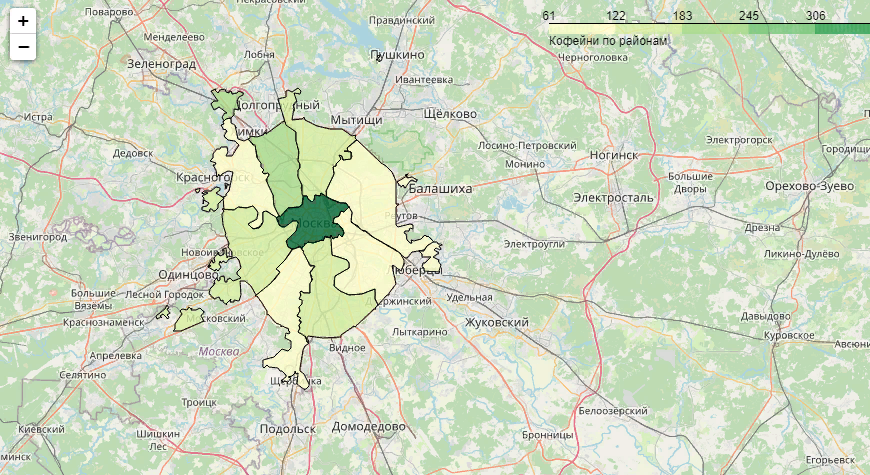

В ЦАО самое большое количество кофеен

In [87]:
data_street = df_coffee.groupby(['street']).agg({'category':'count'})
data_street = data_street.reset_index().sort_values(by= 'category', ascending=False)
data_street.head()

street  category
344           проспект мира        36
212  ленинградский проспект        25
214      ленинский проспект        23
346       профсоюзная улица        18
342    проспект вернадского        16

Также рассмотрели популярные улицы для заведений. Они все имеют большую протяженность. И не сколько важна длина улицы, как места, которые располагаются рядом. Популярные точки притяжения рядом с парком, ботаническим садом или вокзалом

**Есть ли круглосуточные кофейни?**

In [88]:
#Сколько круглосуточных кофеен в городе 
low_streets = df_coffee.groupby('is_24')['name'].count().sort_values(ascending=True)
low_streets

is_24
True       59
False    1350
Name: name, dtype: int64

По всему городу только 59 кофеен круглосуточны. Это число не большое. Видимо ночью люди предпочитают проводить время в других развлекательных заведениях

**Как распределяются рейтинги по районам?**

In [85]:
rating_coffee = df_coffee.groupby('district', as_index=False)['rating'].agg('median')
rating_coffee

district  rating
0         Восточный административный округ     4.3
1          Западный административный округ     4.2
2          Северный административный округ     4.3
3  Северо-Восточный административный округ     4.3
4   Северо-Западный административный округ     4.3
5       Центральный административный округ     4.3
6     Юго-Восточный административный округ     4.3
7      Юго-Западный административный округ     4.3
8             Южный административный округ     4.3

In [ ]:
# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=rating_coffee,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Медианный рейтинг заведений по районам',
).add_to(m)

# выводим карту
m

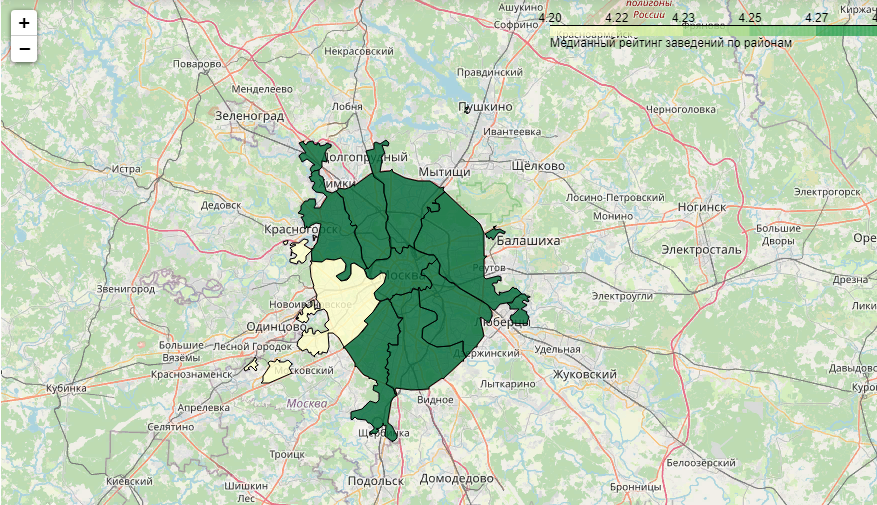

Среднее число рейтинга по всем округам одинаковое, только в ЗАО на 0.1 меньше

**На какую стоимость чашки капучино стоит ориентироваться при открытии**

In [89]:
rating_cup = df_coffee.groupby('district', as_index=False)['middle_coffee_cup'].agg('median')
rating_cup

district  middle_coffee_cup
0         Восточный административный округ              135.0
1          Западный административный округ              189.0
2          Северный административный округ              159.0
3  Северо-Восточный административный округ              162.5
4   Северо-Западный административный округ              169.5
5       Центральный административный округ              190.0
6     Юго-Восточный административный округ              147.5
7      Юго-Западный административный округ              198.0
8             Южный административный округ              152.5

При открытии заведения стоит ориентироваться на среднюю цену в зависимости от района. В данном случае мы видим, что цены везде разные  

## Шаг 5. Подготовка презентации

https://docs.google.com/presentation/d/1ygDIhkCftJiDzUZPfLsKwgBRVO7huYDxKHVt5dFaikQ/edit?usp=sharing

<div class="alert alert-success">
<b>Комментарий ревьюера (2): ✅</b>

В целом работа очень хорошая. Использовано достаточно большое количество информации, которое складывается в одну общую картинку.
    
На самом деле, там где мы используем повторяющиеся действия по построениям графиков, то есть однотипные графики, рекомендую создавать функции, чтобы не писать один и тот же код несколько раз. Тем самым сможем автоматизировать и оптимизировать свой проект.
    
---
    
    
Презентация сделана хорошо, особенно порадовало:
    
- её структурность
- наличие общих выводов и рекомендаций
- выводы для всех графиков
- последовательность
- стиль
- файл презентации в доступном формате
    
    
    
Как её можно было бы ещё улучшить:
    
    
- сформировать summary в самом начале презентации, все любят видеть результат сразу 😊
- добавить цель самого исследования на втором слайде
- пронумеровать слайды
- сделать оглавление
- добавить описание источника данных
    
В остальном всё чудно😊
    

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2): ✅</b>
    

Возвращаю проект обратно, чтобы убедиться что все мои комментарии понятны.
    
Если вдруг у тебя возникнут какие-то вопросы, то я с радостью отвечу на них 😊
    
</div>

<div class="alert alert-info"> <b> *</b> У меня вопрос вопрос. Когда я строю карты в юпитере на компьтере (не в яндекс), у меня черные они. Как можно решить проблему?  </div>

<div class="alert alert-success">
<b>Комментарий ревьюера (3): ✅</b>
    
К сожалению не сталкивался с такой проблемой ☹️, единтсвенное что могу посоветовать только поискать в интернете решение.
    
---

Рад, что в остальном в целом все понятно. Тогда предлагаю двигаться дальше.
    
Поздравляю с успешным завершением проекта 😊👍
    
И желаю успехов в новых работах 😊
    
    
</div>